# Train and test AVIDNet

In [1]:
import torch
import os
from collections import defaultdict

from datasets.utils import create_datasets, get_data_loaders, show_samples
from models.model import save_model, load_model
from models.train import train_models
from models.utils import set_random_seed

## Create datasets

In [2]:
cfg = {
#     'purpose' : 'baseline',
    'purpose' : 'fixmatch',
    'data_dir' : '/media/aiffel0042/SSD256/temp/AVIDNet/data/CXR/ori',
#     'data_dir' : '/media/aiffel0042/SSD256/temp/AVIDNet/data/CT',
    'num_labeled': 25, #<- 코드 이름이 맞추기
    'mu' : 4,
    'fold' : 1,
    'epochs' : 2,
    'batch_size': 6,
    'metric_types' : ['acc', 'ppv', 'recall', 'f1'],
    'dataset_types': ['train', 'test']
}
create_datasets(cfg)

Test samples

['covid-19', 'pneumonia', 'normal']


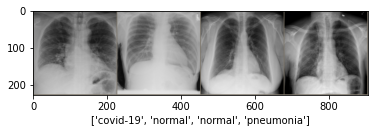

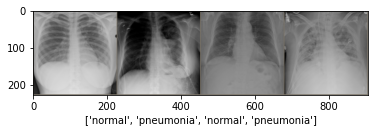

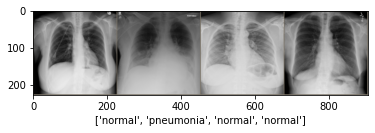

In [3]:
sample_loaders, _, class_names = get_data_loaders(dataset_type='test', cfg=cfg,
                                                  fold_id=0, overwrite=True)
print(class_names)
show_samples(sample_loaders['test'], class_names, iter_num=3, mu=cfg['mu'])

## Train the model

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
random_seed = 0
set_random_seed(random_seed)

trained_models = train_models(cfg, device)

--------------------
Model 1
--------------------

Epoch 0/1
----------
[train]
LOSS - 1.0060
ACC - 0.5000
PPV - ALL: 0.4667  COVID-19: 0.4000  PNEUMONIA: 0.0000  NORMAL: 1.0000 
RECALL - ALL: 0.5000  COVID-19: 1.0000  PNEUMONIA: 0.0000  NORMAL: 0.5000 
F1 - ALL: 0.4127  COVID-19: 0.5714  PNEUMONIA: 0.0000  NORMAL: 0.6667 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0539
ACC - 0.5472
PPV - ALL: 0.5030  COVID-19: 0.1791  PNEUMONIA: 0.7500  NORMAL: 0.5799 
RECALL - ALL: 0.3981  COVID-19: 0.2400  PNEUMONIA: 0.0152  NORMAL: 0.9390 
F1 - ALL: 0.3173  COVID-19: 0.2051  PNEUMONIA: 0.0298  NORMAL: 0.7170 

Epoch 1/1
----------
[train]
LOSS - 0.9756
ACC - 0.8333
PPV - ALL: 0.8889  COVID-19: 0.6667  PNEUMONIA: 1.0000  NORMAL: 1.0000 
RECALL - ALL: 0.8333  COVID-19: 1.0000  PNEUMONIA: 0.5000  NORMAL: 1.0000 
F1 - ALL: 0.8222  COVID-19: 0.8000  PNEUMONIA: 0.6667  NORMAL: 1.0000 
Mask ratio's range: 1.0 ~ 1.0

[test]
LOSS - 1.0137
ACC - 0.5725
PPV - ALL: 0.5345  COVID-19: 0.2692  PNEUMONIA: 0.75

## Save and load the model

In [5]:
out_dir = f'trained_models/{cfg["purpose"]}'
save_model(trained_models, out_dir, cfg)

In [6]:
trained_models = load_model(cfg)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

## Reference

- https://tutorials.pytorch.kr/beginner/saving_loading_models.html
- https://stackoverflow.com/questions/42480111/model-summary-in-pytorch

## Evaluate the model - WIP (Work In Process)

In [7]:
# def evaluate_model(model, criterion, optimizer):
#     since = time.time()

#     model.eval()   # Set model to evaluate mode

#     CLS = {0: 'COVID-19', 1: 'Pneumonia', 2: 'Normal'}
#     running_loss = 0.0
#     running_corrects = 0
#     acc, size, fp, fn = defaultdict(int), defaultdict(int), defaultdict(int), defaultdict(int)

#     # Iterate over data.
#     for inputs, labels in dataloaders['test']:
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward
#         outputs = model(inputs)
#         _, preds = torch.max(outputs, 1)
#         loss = criterion(outputs, labels)

#         # statistics
#         running_loss += loss.item() * inputs.size(0)
#         running_corrects += torch.sum(preds == labels.data)
#         for pred, label in zip(preds, labels.data):
#             size[CLS[label.item()]] += 1
#             if pred == label.data:
#                 acc[CLS[label.item()]] += 1
#             else:
#                 fp[CLS[pred.item()]] += 1
#                 fn[CLS[label.item()]] += 1

#         iter_loss = running_loss / dataset_sizes['test']
#         iter_acc = running_corrects.double() / dataset_sizes['test']

#     print('Loss: {:.4f} Acc: {:.4f}'.format(iter_loss, iter_acc))
#     accs = {c: round(float(n) / size[c], 4) for c, n in acc.items()}
#     ppv = {c: round(float(n) / (acc[c] + sum([s for c_temp, s in fp.items()
#                                               if c_temp != c])), 4)
#            for c, n in acc.items()}
#     recall = {c: round(float(n) / (acc[c] + sum([s for c_temp, s in fn.items()
#                                                  if c_temp != c])), 4)
#               for c, n in acc.items()}
#     print(f'[ACC] COVID-19: {accs["COVID-19"]}, Pnuemonia: {accs["Pneumonia"]}, Normal: {accs["Normal"]}')
#     print(f'[PPV] COVID-19: {ppv["COVID-19"]}, Pnuemonia: {ppv["Pneumonia"]}, Normal: {ppv["Normal"]}')
#     print(f'[Recall] COVID-19: {recall["COVID-19"]}, Pnuemonia: {recall["Pneumonia"]}, Normal: {recall["Normal"]}')

#     time_elapsed = time.time() - since
#     print('Test complete in {:.0f}m {:.0f}s'.format(
#         time_elapsed // 60, time_elapsed % 60))

In [8]:
# evaluate_model(model_ft, criterion, optimizer_ft)